In [20]:
import pandas as pd
import os
import matplotlib.pylab as plt

In [21]:
header_names = ["date","price","size","bid","ask","volume",
                "m1_buy","m5_buy","m10_buy","m20_buy","m50_buy",
                "m1_sell","m5_sell","m10_sell","m20_sell","m50_sell"]

In [22]:
# first, combine dates into single files
files = os.listdir('../data')
tsv_files = [f for f in files if ".log" in f]
tsv_files.sort()
tsv_files

['book.2019-05-27-103826.0.log', 'book.2019-05-27-105332.0.log']

In [23]:
li = []

for filename in tsv_files:
    df = pd.read_csv('../data/'+filename, sep='\t', index_col=None, header=0)
    df.columns = header_names
    li.append(df)

frame = pd.concat(li, axis=0, sort=False, ignore_index=True)
frame.head(10)

,date,price,size,bid,ask,volume,m1_buy,m5_buy,m10_buy,m20_buy,m50_buy,m1_sell,m5_sell,m10_sell,m20_sell,m50_sell
0,2019-05-27T17:38:33.430Z,8725.11,0.011863,8725.10,8725.16,31391.224792,8670.00,8480.6,8220.00,7500.0,4487.0,8768.81,9000.0,9234.99,10040.79,250000
1,2019-05-27T17:38:42.114Z,8720.08,0.079481,8719.36,8722.97,31391.224792,8668.00,8480.6,8210.00,7493.0,4469.2,8768.16,9000.0,9233.04,10040.79,250000
2,2019-05-27T17:38:53.868Z,8709.29,0.018221,8706.20,8714.08,31397.255512,8668.00,8480.6,8210.00,7500.0,4487.0,8768.16,9000.0,9234.99,10040.79,250000
3,2019-05-27T17:39:01.808Z,8709.31,0.058725,8708.03,8709.31,31397.255512,8668.00,8480.6,8210.00,7500.0,4487.0,8764.98,9000.0,9233.04,10040.79,250000
4,2019-05-27T17:39:12.643Z,8704.11,0.020628,8701.42,8706.13,31397.255512,8668.00,8480.6,8210.00,7500.0,4487.0,8765.99,9000.0,9220.00,10040.79,250000
5,2019-05-27T17:39:21.475Z,8700.11,0.100000,8700.10,8700.11,31397.255512,8663.20,8480.6,8230.00,7500.0,4487.0,8761.77,9000.0,9200.00,10015.02,250000
6,2019-05-27T17:39:33.820Z,8708.60,0.050000,8703.13,8710.80,31397.255512,8675.39,8480.6,8250.00,7500.0,4487.0,8765.99,9000.0,9250.00,10040.79,250000
7,2019-05-27T17:39:42.500Z,8712.93,0.060165,8714.36,8717.90,31424.562591,8682.71,8480.6,8236.79,7500.0,4487.0,8777.75,9000.0,9240.00,10040.79,250000
8,2019-05-27T17:39:49.223Z,8717.54,0.062612,8712.94,8717.20,31424.562591,8680.00,8480.6,8233.71,7500.0,4487.0,8765.99,9000.0,9200.40,10025.00,250000
9,2019-05-27T17:40:03.276Z,8708.30,0.112463,8705.00,8708.24,31424.562591,8662.03,8480.6,8202.00,7490.0,4469.2,8760.00,9000.0,9200.00,10015.02,250000


<IPython.core.display.Javascript object>


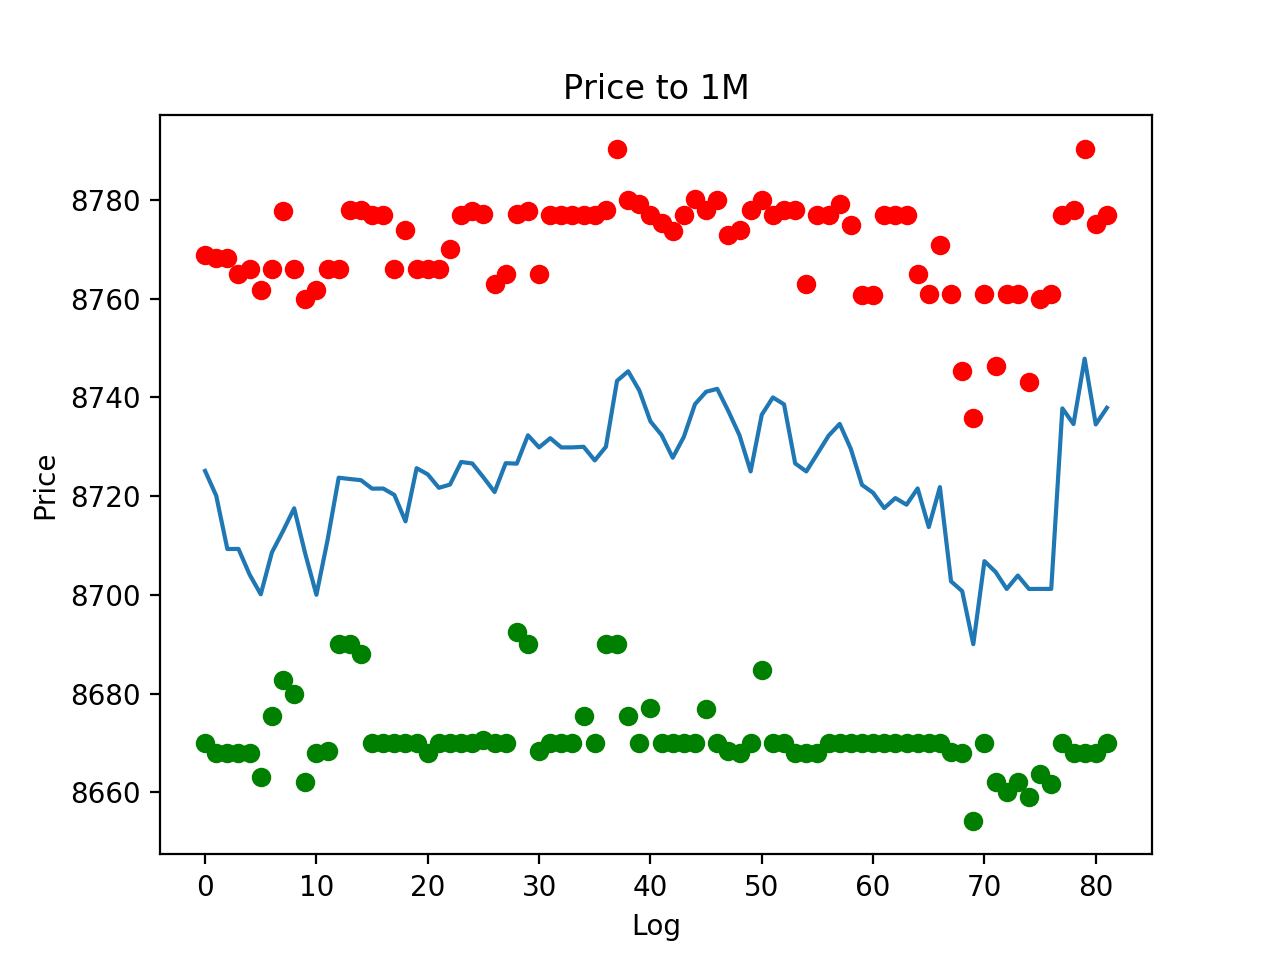

In [27]:
%matplotlib notebook

plt.figure(1)
plt.title('Price to 1M')
plt.xlabel('Log')
plt.ylabel('Price')
plt.plot(frame.price)
plt.plot(frame.m1_buy, 'go', label='m1')
plt.plot(frame.m1_sell, 'ro', label='m5')
plt.show()